Welcome to the National Water Model (NWM) Sandbox 2! In this Jupyter Notebook we will play around with a NetCDF (Network Common Data Form) file obtained from the NWM using a Python package called xarray. NetCDF files are a standardized way of exchanging scientific data. NetCDF is well suited for multidimensional data arrays such as meteorological or observational datasets. NetCDF files work well for NWM forecasts and contain a lot of useful metadata. Xarray is a Python package which uses NumPy and pandas and works well with NetCDF. 

In [6]:
import xarray as xr
import numpy as np
from datetime import date
import os
import requests

In [7]:
today = date.today()
today = str(today)
today = today.replace("-", "")

def GetForecastFileName(ForecastStart='00', Type = 'short_range', Member='1', TimeStep = '001'):
  BaseName = 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/nwm/prod/nwm.'

  today

  if (Type == 'short_range'):
    return BaseName + today + '/short_range/nwm.t' + ForecastStart +'z.short_range.channel_rt.f' + TimeStep + '.conus.nc'
  elif (Type == 'medium_range'): 
    return BaseName + today + '/medium_range_mem' + Member + '/nwm.t' + ForecastStart +'z.medium_range.channel_rt_' + Member + '.f' + TimeStep + '.conus.nc'
  elif (Type == 'long_range'):
    return BaseName + today + '/long_range_mem' + Member + '/nwm.t' + ForecastStart +'z.long_range.channel_rt_' + Member + '.f' + TimeStep + '.conus.nc'
  else:
    return 'error'

def GetForecastFile(Url = 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/nwm/prod/nwm.20210321/short_range/nwm.t00z.short_range.channel_rt.f001.conus.nc'):
  FileName = os.path.basename(Url)
  if os.path.exists(FileName):
    os.remove(FileName)
  r = requests.get(Url, allow_redirects=True)
  open(FileName, 'wb').write(r.content)
  return FileName

In [8]:
ForecastStart = '00'
Type = 'short_range'
Member = '1'
Timestep = '001'

url = GetForecastFileName(ForecastStart,Type,Member,Timestep)
path = GetForecastFile(url)


In [9]:
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:         (feature_id: 2776738, reference_time: 1, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 2021-05-21T01:00:00
  * reference_time  (reference_time) datetime64[ns] 2021-05-21
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
Data variables:
    crs             |S1 ...
    streamflow      (feature_id) float64 ...
    nudge           (feature_id) float64 ...
    velocity        (feature_id) float64 ...
    qSfcLatRunoff   (feature_id) float64 ...
    qBucket         (feature_id) float64 ...
    qBtmVertRunoff  (feature_id) float64 ...
Attributes:
    TITLE:                      OUTPUT FROM NWM v2.1
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2021-05-21_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2021-05-21_01:00:00
    model_total_valid_times:    18
    stream_order_output:        1
    cdm_datatype:               Station
    Conventions:                CF-1.6
    code_version:               v5.2.0-beta2
    NWM_version_number:         v2.1
    model_output_type:          channel_rt
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

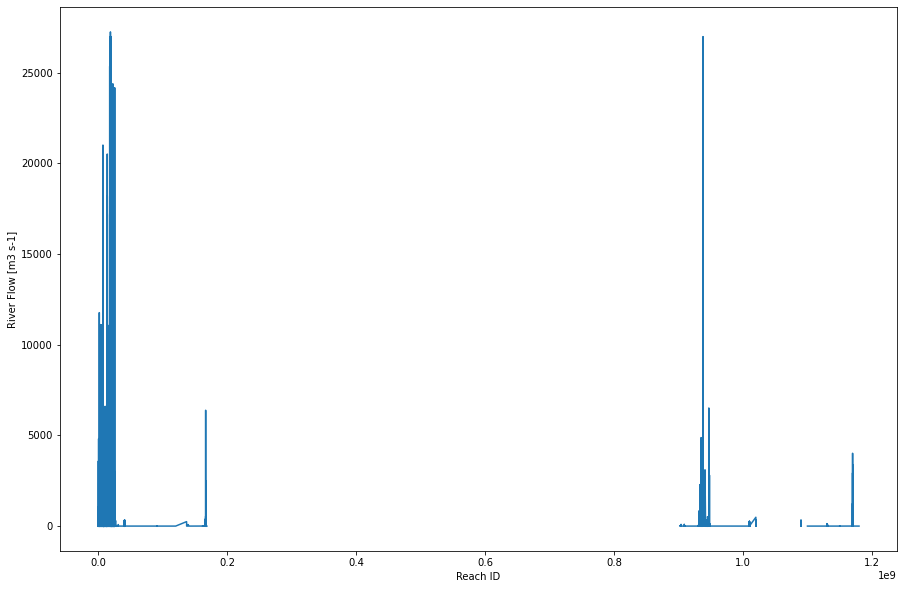

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)
ds.streamflow.plot()